# Análisis de watchers, forks y stars en los repositorios en Github
Este análisis netamente considera los counts de watchers, forks y stars en los repositorios en Github.

## Cargar dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Cargar archivo CSV de entrada

In [2]:
# generamos DF a partir de CSV de entrada
input_file = '../csvs/repo_metadata.csv'
raw_df = pd.read_csv(input_file)
raw_df

,project_id,watchers_count,forks_count,stargazers_count,open_issues_count,contributor_count
0,0xEduardo/nodeless,0,0,0,2,1
1,0xayot/waas,0,0,0,0,2
2,20minutes/serverless-github-check,14,0,14,0,5
3,20minutes/serverless-provisioned-memory-report,1,0,1,0,3
4,2amigos/laravel-mail-api,4,1,4,0,2
...,...,...,...,...,...,...
663,zacbe/url-shortener,0,0,0,3,2
664,zinxon/CantekWebApp-BE,0,0,0,0,5
665,zkcloudworker/zkcloudworker-aws,1,1,1,1,1
666,zommerfelds/website-cz,0,0,0,4,2


Copiamos este DataFrame para convertir el tipo de dato de las columnas a numérico

In [3]:
df = raw_df.copy()
df['watchers_count'] = pd.to_numeric(df['watchers_count'], errors='coerce')
forks_df = raw_df.copy()
forks_df['forks_count'] = pd.to_numeric(forks_df['forks_count'], errors='coerce')
stars_df = raw_df.copy()
stars_df['stargazers_count'] = pd.to_numeric(stars_df['stargazers_count'], errors='coerce')
issues_df = raw_df.copy()
issues_df['open_issues_count'] = pd.to_numeric(issues_df['open_issues_count'], errors='coerce')
contributors_df = raw_df.copy()
contributors_df['contributor_count'] = pd.to_numeric(contributors_df['contributor_count'], errors='coerce')

In [4]:
# guardamos el nuevo DataFrame en un nuevo CSV
output_file = '../temp_data/github_repo_counts_watchers.csv'
df.to_csv(output_file, index=False)
output_file_forks = '../temp_data/github_repo_counts_forks.csv'
forks_df.to_csv(output_file_forks, index=False)
output_file_stars = '../temp_data/github_repo_counts_stars.csv'
stars_df.to_csv(output_file_stars, index=False)
output_file_issues = '../temp_data/github_repo_counts_issues.csv'
issues_df.to_csv(output_file_issues, index=False)
output_file_contributors = '../temp_data/github_repo_counts_contributors.csv'
contributors_df.to_csv(output_file_contributors, index=False)

## Análisis estadístico (watchers)

In [5]:
# resumen estadístico de la columna 'watchers_count'
watchers_count_summary = df['watchers_count'].describe()

# máximo
max_value = df['watchers_count'].max()

# mínimo
min_value = df['watchers_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = df['watchers_count'].median()

# varianza
variance_value = df['watchers_count'].var()

# desviación estándar
std_deviation_value = df['watchers_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(watchers_count_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count    668.00
mean      24.90
std      161.76
min        0.00
25%        0.00
50%        0.00
75%        4.00
max     3252.00
Name: watchers_count, dtype: float64

Máx.: 3252
Mín.: 0
Rango: 3252
Median: 0.0
Varianza: 26164.791413425024
Standard deviation: 161.7553443117878


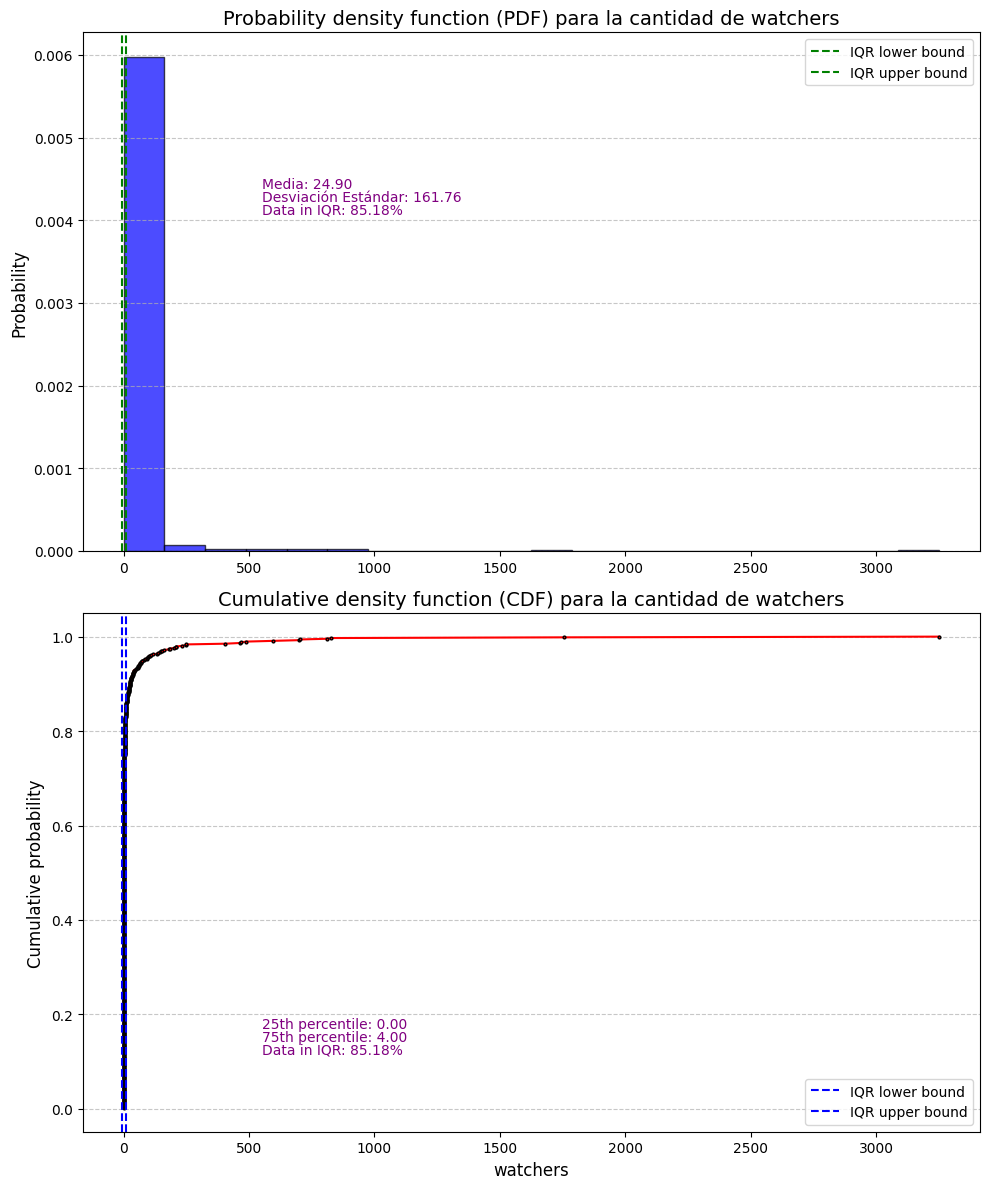

In [6]:
# extraer la columna 'watchers_count'
watchers_count_data = df['watchers_count']

# calcular el rango intercuartil (IQR)
Q1 = watchers_count_data.quantile(0.25)
Q3 = watchers_count_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
percentage_in_iqr = ((watchers_count_data >= iqr_lower_bound) & (watchers_count_data <= iqr_upper_bound)).mean() * 100

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(watchers_count_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de watchers', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data = np.sort(watchers_count_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('watchers', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de watchers', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.2, 0.7, 'Media: {:.2f}'.format(watchers_count_data.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.675, 'Desviación Estándar: {:.2f}'.format(watchers_count_data.std()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.2, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.150, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax2.transAxes, fontsize=10, color='purple')

# incluir el rango intercuartil en la PDF
ax1.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax1.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax1.legend(loc='upper right', fontsize=10)

# incluir el rango intercuartil en la CDF
ax2.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax2.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax2.legend(loc='lower right', fontsize=10)

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_watchers_count_data.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()



### Filtrado de datos aberrantes
En base a las observaciones anteriores, y a las curvas presentadas, se tiene un alto grado de varianza en torno a los valores extremos de cantidad de watchers de cada repositorio. Es posible hacer un filtrado de datos aberrantes, en base al rango intercuartil (IQR) del conjunto de datos, para obtener una gráfica y un análisis mucho más representativo, ya que el 84.66% de estos datos consiste en conteos que reflejan un poco mejor la realidad de la mayoría de los proyectos implementados en AWS Lambda.

In [7]:
# se remueven datos aberrantes del DataFrame
non_outliers_df = df[(df['watchers_count'] >= iqr_lower_bound) & (df['watchers_count'] <= iqr_upper_bound)]

#### Análisis estadístico

In [8]:
# resumen estadístico de la columna 'watchers_count'
watchers_count_summary_filtered = non_outliers_df['watchers_count'].describe()

# máximo
max_value_filtered = non_outliers_df['watchers_count'].max()

# mínimo
min_value_filtered = non_outliers_df['watchers_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value_filtered = max_value_filtered - min_value_filtered

# mediana
median_value_filtered = non_outliers_df['watchers_count'].median()

# varianza
variance_value_filtered = non_outliers_df['watchers_count'].var()

# desviación estándar
std_deviation_value_filtered = non_outliers_df['watchers_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(watchers_count_summary_filtered)
print("\nMáx.:", max_value_filtered)
print("Mín.:", min_value_filtered)
print("Rango:", range_value_filtered)
print("Median:", median_value_filtered)
print("Varianza:", variance_value_filtered)
print("Standard deviation:", std_deviation_value_filtered)

Resumen estadístico:
count   569.00
mean      1.13
std       2.12
min       0.00
25%       0.00
50%       0.00
75%       1.00
max      10.00
Name: watchers_count, dtype: float64

Máx.: 10
Mín.: 0
Rango: 10
Median: 0.0
Varianza: 4.475086016980619
Standard deviation: 2.1154399109832025


#### Nuevos gráficos de PDF y CDF

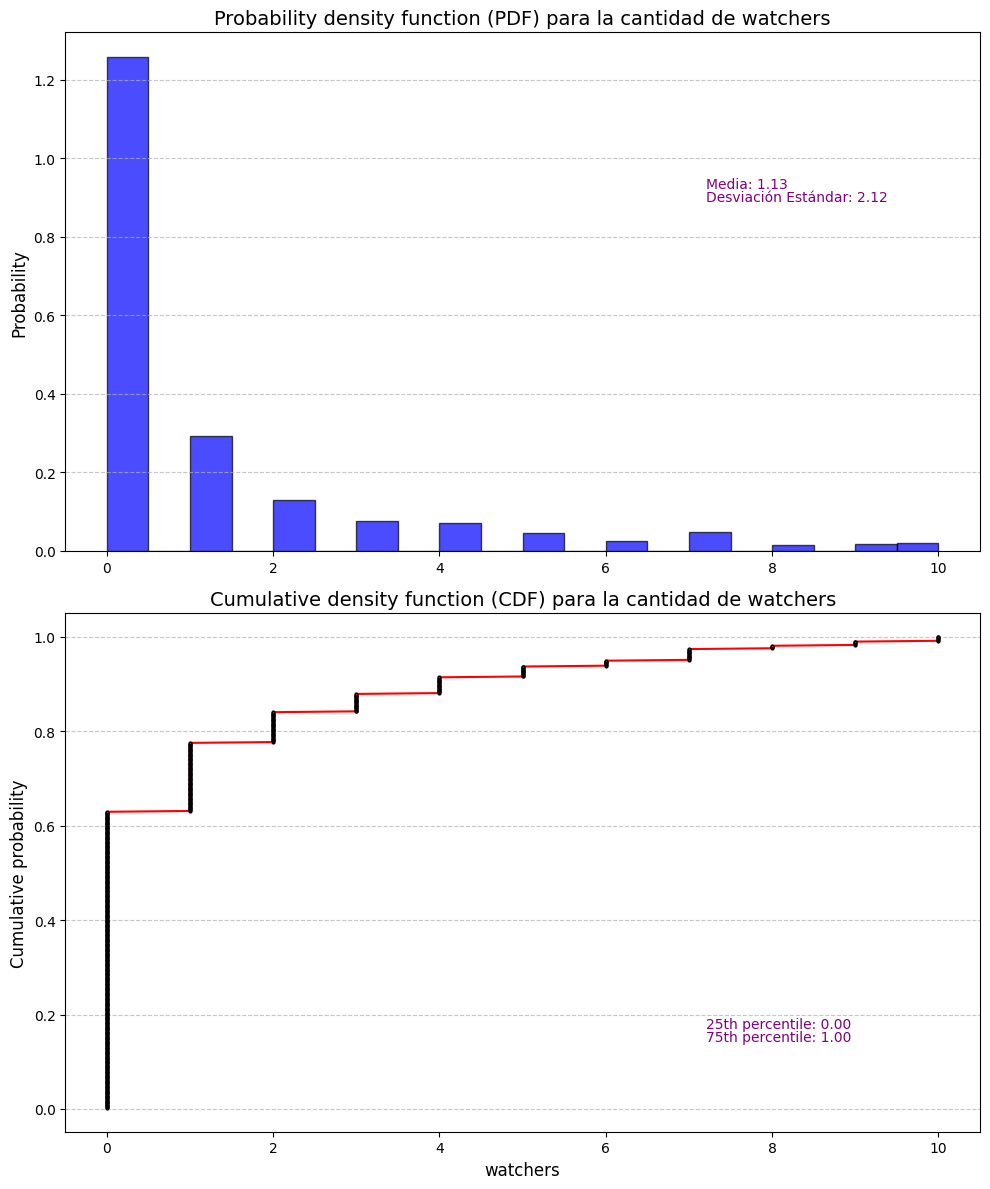

In [9]:
# extraer la columna 'watchers_count'
watchers_count_data_filtered = non_outliers_df['watchers_count']

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(watchers_count_data_filtered, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de watchers', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data_filtered = np.sort(watchers_count_data_filtered)
y = np.arange(1, len(sorted_data_filtered) + 1) / len(sorted_data_filtered)
ax2.plot(sorted_data_filtered, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('watchers', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de watchers', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.7, 0.7, 'Media: {:.2f}'.format(watchers_count_data_filtered.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.7, 0.675, 'Desviación Estándar: {:.2f}'.format(watchers_count_data_filtered.std()), transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.7, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.7, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 75)), transform=ax2.transAxes, fontsize=10, color='purple')

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_watchers_count_data_filtered.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()



## Análisis estadístico (forks)

In [10]:
# resumen estadístico de la columna 'forks_count'
forks_count_summary = forks_df['forks_count'].describe()

# máximo
max_value = forks_df['forks_count'].max()

# mínimo
min_value = forks_df['forks_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = forks_df['forks_count'].median()

# varianza
variance_value = forks_df['forks_count'].var()

# desviación estándar
std_deviation_value = forks_df['forks_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(forks_count_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count   668.00
mean      5.20
std      23.70
min       0.00
25%       0.00
50%       0.00
75%       1.00
max     373.00
Name: forks_count, dtype: float64

Máx.: 373
Mín.: 0
Rango: 373
Median: 0.0
Varianza: 561.8526492741654
Standard deviation: 23.703431170912058


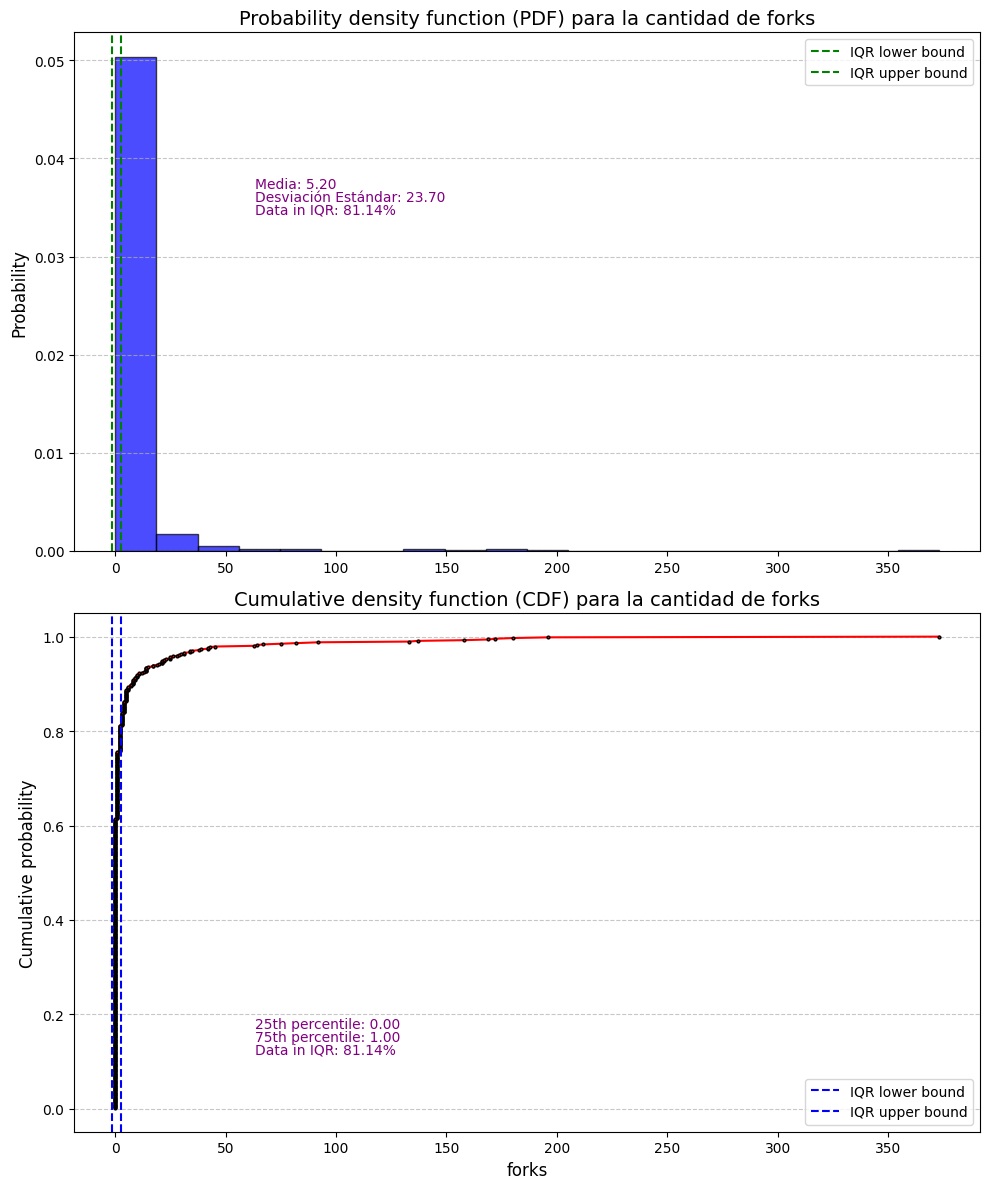

In [11]:
# extraer la columna 'forks_count'
forks_count_data = forks_df['forks_count']

# calcular el rango intercuartil (IQR)
Q1 = forks_count_data.quantile(0.25)
Q3 = forks_count_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
percentage_in_iqr = ((forks_count_data >= iqr_lower_bound) & (forks_count_data <= iqr_upper_bound)).mean() * 100

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(forks_count_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de forks', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data = np.sort(forks_count_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('forks', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de forks', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.2, 0.7, 'Media: {:.2f}'.format(forks_count_data.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.675, 'Desviación Estándar: {:.2f}'.format(forks_count_data.std()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.2, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.150, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax2.transAxes, fontsize=10, color='purple')

# incluir el rango intercuartil en la PDF
ax1.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax1.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax1.legend(loc='upper right', fontsize=10)

# incluir el rango intercuartil en la CDF
ax2.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax2.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax2.legend(loc='lower right', fontsize=10)

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_forks_count_data.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()



### Filtrado de datos aberrantes
En base a las observaciones anteriores, y a las curvas presentadas, se tiene un alto grado de varianza en torno a los valores extremos de cantidad de forks de cada repositorio. Es posible hacer un filtrado de datos aberrantes, en base al rango intercuartil (IQR) del conjunto de datos, para obtener una gráfica y un análisis mucho más representativo, ya que el 85.68% de estos datos consiste en conteos que reflejan un poco mejor la realidad de la mayoría de los proyectos implementados en AWS Lambda.

In [12]:
# se remueven datos aberrantes del DataFrame
non_outliers_df = forks_df[(forks_df['forks_count'] >= iqr_lower_bound) & (forks_df['forks_count'] <= iqr_upper_bound)]

#### Análisis estadístico

In [13]:
# resumen estadístico de la columna 'forks_count'
forks_count_summary_filtered = non_outliers_df['forks_count'].describe()

# máximo
max_value_filtered = non_outliers_df['forks_count'].max()

# mínimo
min_value_filtered = non_outliers_df['forks_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value_filtered = max_value_filtered - min_value_filtered

# mediana
median_value_filtered = non_outliers_df['forks_count'].median()

# varianza
variance_value_filtered = non_outliers_df['forks_count'].var()

# desviación estándar
std_deviation_value_filtered = non_outliers_df['forks_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(forks_count_summary_filtered)
print("\nMáx.:", max_value_filtered)
print("Mín.:", min_value_filtered)
print("Rango:", range_value_filtered)
print("Median:", median_value_filtered)
print("Varianza:", variance_value_filtered)
print("Standard deviation:", std_deviation_value_filtered)

Resumen estadístico:
count   542.00
mean      0.31
std       0.59
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       2.00
Name: forks_count, dtype: float64

Máx.: 2
Mín.: 0
Rango: 2
Median: 0.0
Varianza: 0.35176419231844813
Standard deviation: 0.5930971187912214


#### Nuevos gráficos de PDF y CDF

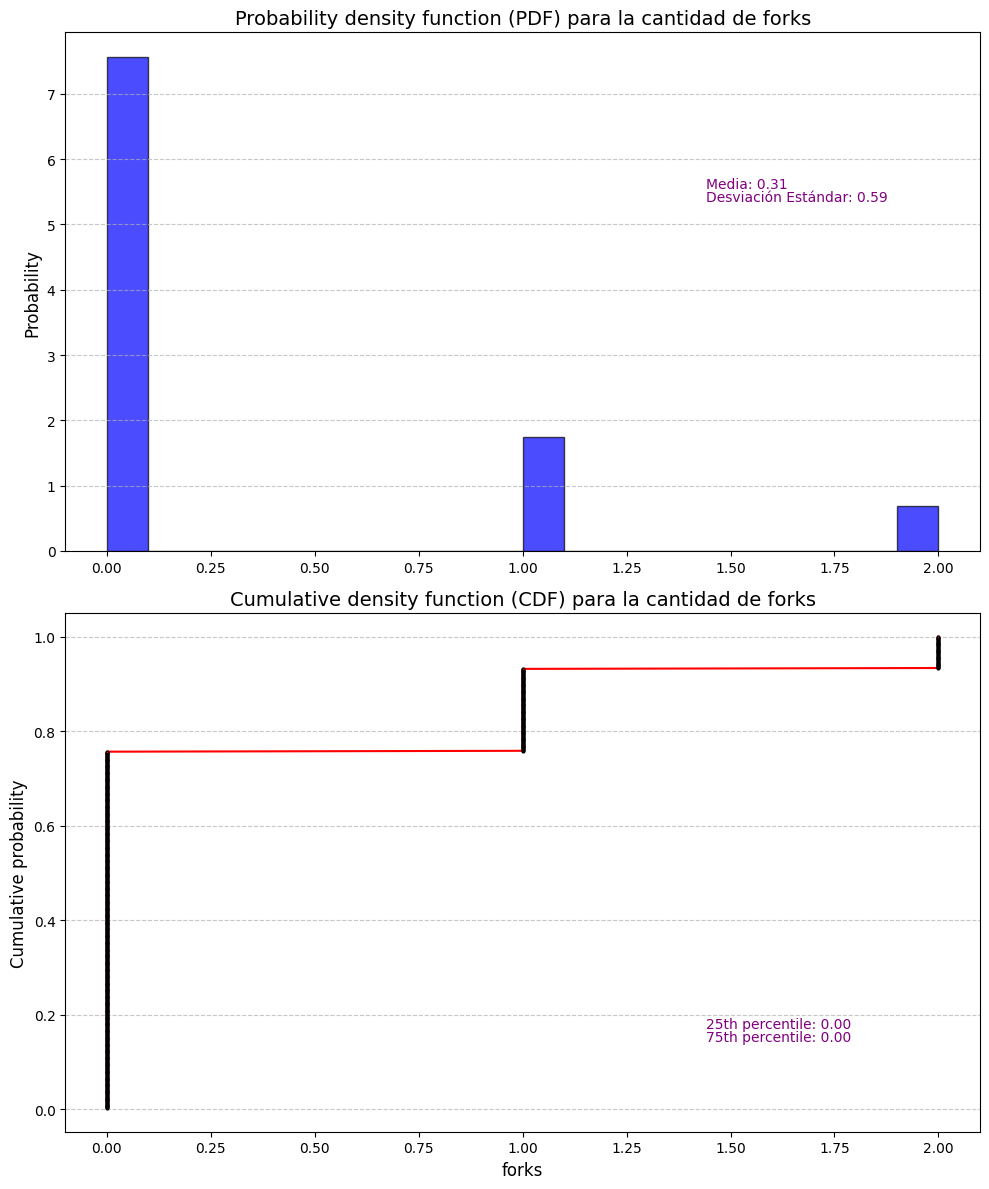

In [14]:
# extraer la columna 'forks_count'
forks_count_data_filtered = non_outliers_df['forks_count']

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(forks_count_data_filtered, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de forks', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data_filtered = np.sort(forks_count_data_filtered)
y = np.arange(1, len(sorted_data_filtered) + 1) / len(sorted_data_filtered)
ax2.plot(sorted_data_filtered, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('forks', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de forks', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.7, 0.7, 'Media: {:.2f}'.format(forks_count_data_filtered.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.7, 0.675, 'Desviación Estándar: {:.2f}'.format(forks_count_data_filtered.std()), transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.7, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.7, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 75)), transform=ax2.transAxes, fontsize=10, color='purple')

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_forks_count_data_filtered.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()



## Análisis estadístico (stars)

In [15]:
# resumen estadístico de la columna 'stargazers_count'
stargazers_count_summary = stars_df['stargazers_count'].describe()

# máximo
max_value = stars_df['stargazers_count'].max()

# mínimo
min_value = stars_df['stargazers_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = stars_df['stargazers_count'].median()

# varianza
variance_value = stars_df['stargazers_count'].var()

# desviación estándar
std_deviation_value = stars_df['stargazers_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(stargazers_count_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count    668.00
mean      24.90
std      161.76
min        0.00
25%        0.00
50%        0.00
75%        4.00
max     3252.00
Name: stargazers_count, dtype: float64

Máx.: 3252
Mín.: 0
Rango: 3252
Median: 0.0
Varianza: 26164.791413425024
Standard deviation: 161.7553443117878


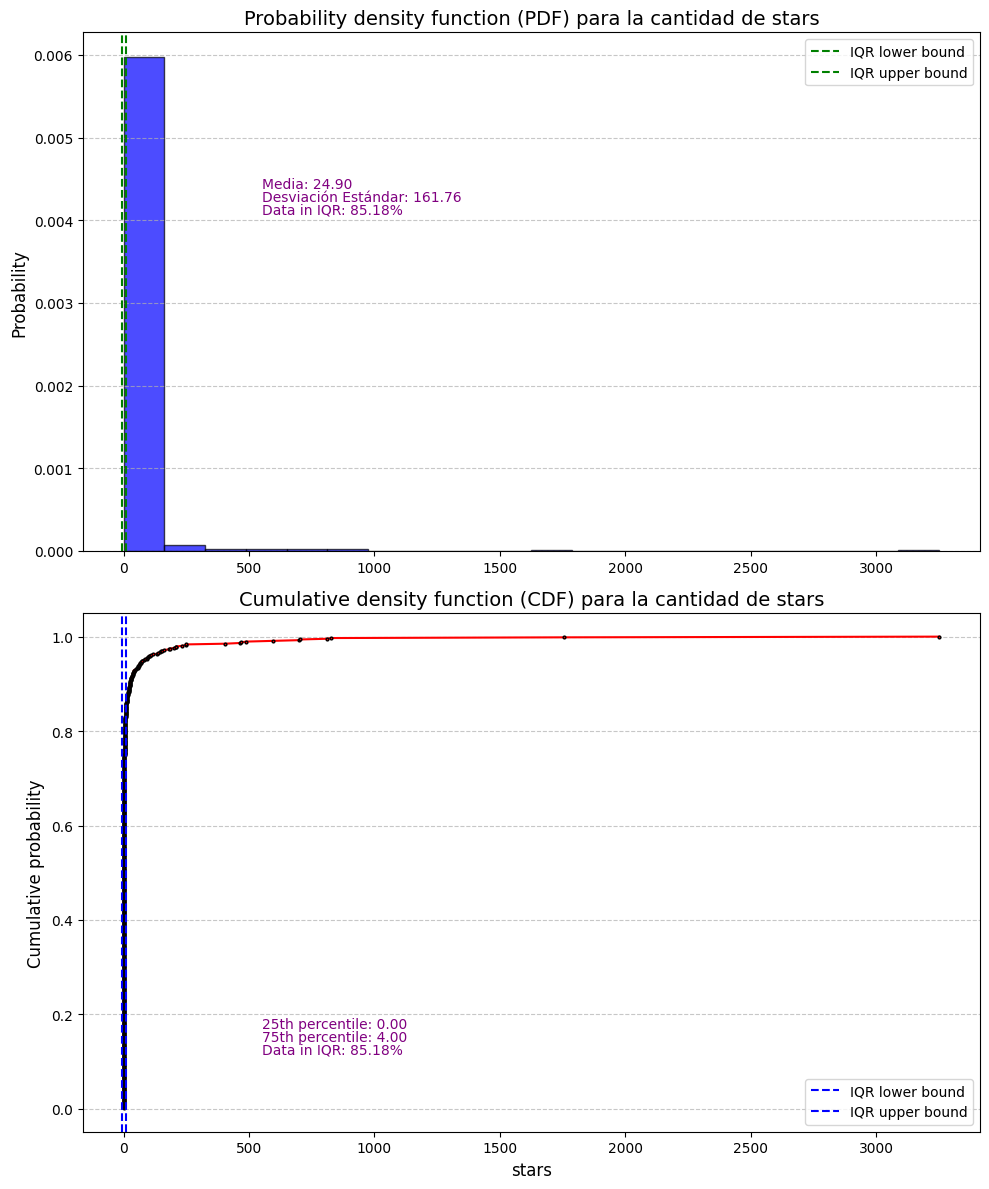

In [16]:
# extraer la columna 'stargazers_count'
stargazers_count_data = stars_df['stargazers_count']

# calcular el rango intercuartil (IQR)
Q1 = stargazers_count_data.quantile(0.25)
Q3 = stargazers_count_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
percentage_in_iqr = ((stargazers_count_data >= iqr_lower_bound) & (stargazers_count_data <= iqr_upper_bound)).mean() * 100

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(stargazers_count_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de stars', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data = np.sort(stargazers_count_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('stars', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de stars', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.2, 0.7, 'Media: {:.2f}'.format(stargazers_count_data.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.675, 'Desviación Estándar: {:.2f}'.format(stargazers_count_data.std()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.2, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.2, 0.150, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax2.transAxes, fontsize=10, color='purple')

# incluir el rango intercuartil en la PDF
ax1.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax1.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax1.legend(loc='upper right', fontsize=10)

# incluir el rango intercuartil en la CDF
ax2.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax2.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax2.legend(loc='lower right', fontsize=10)

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_stargazers_count_data.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()



### Filtrado de datos aberrantes
En base a las observaciones anteriores, y a las curvas presentadas, se tiene un alto grado de varianza en torno a los valores extremos de cantidad de stars de cada repositorio. Es posible hacer un filtrado de datos aberrantes, en base al rango intercuartil (IQR) del conjunto de datos, para obtener una gráfica y un análisis mucho más representativo, ya que el 84.66% de estos datos consiste en conteos que reflejan un poco mejor la realidad de la mayoría de los proyectos implementados en AWS Lambda.

In [17]:
# se remueven datos aberrantes del DataFrame
non_outliers_df = stars_df[(stars_df['stargazers_count'] >= iqr_lower_bound) & (stars_df['stargazers_count'] <= iqr_upper_bound)]

#### Análisis estadístico

In [18]:
# resumen estadístico de la columna 'stargazers_count'
stargazers_count_summary_filtered = non_outliers_df['stargazers_count'].describe()

# máximo
max_value_filtered = non_outliers_df['stargazers_count'].max()

# mínimo
min_value_filtered = non_outliers_df['stargazers_count'].min()

# rango (diferencia entre máximo y mínimo)
range_value_filtered = max_value_filtered - min_value_filtered

# mediana
median_value_filtered = non_outliers_df['stargazers_count'].median()

# varianza
variance_value_filtered = non_outliers_df['stargazers_count'].var()

# desviación estándar
std_deviation_value_filtered = non_outliers_df['stargazers_count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(stargazers_count_summary_filtered)
print("\nMáx.:", max_value_filtered)
print("Mín.:", min_value_filtered)
print("Rango:", range_value_filtered)
print("Median:", median_value_filtered)
print("Varianza:", variance_value_filtered)
print("Standard deviation:", std_deviation_value_filtered)

Resumen estadístico:
count   569.00
mean      1.13
std       2.12
min       0.00
25%       0.00
50%       0.00
75%       1.00
max      10.00
Name: stargazers_count, dtype: float64

Máx.: 10
Mín.: 0
Rango: 10
Median: 0.0
Varianza: 4.475086016980619
Standard deviation: 2.1154399109832025


#### Nuevos gráficos de PDF y CDF

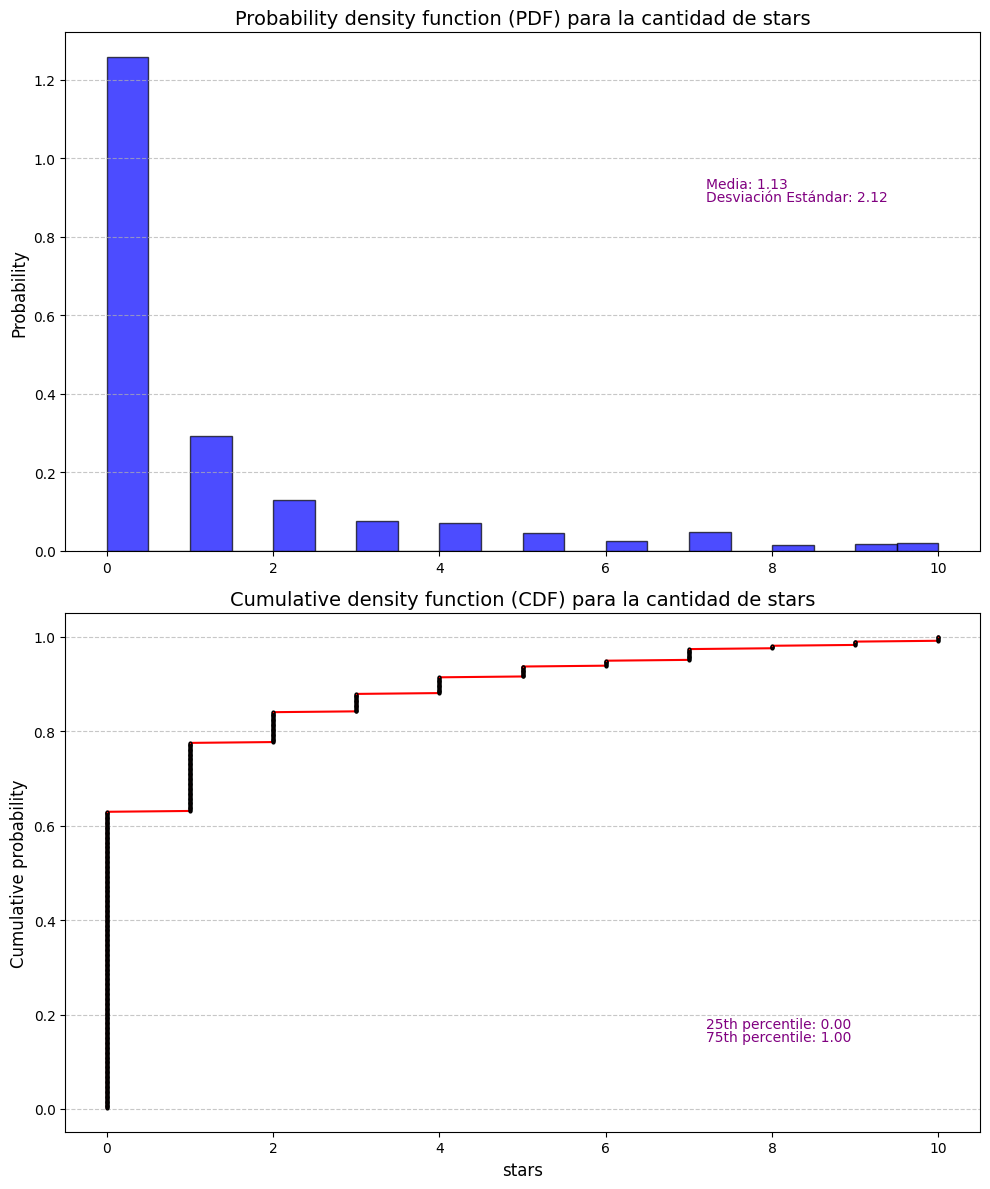

In [19]:
# extraer la columna 'stargazers_count'
stargazers_count_data_filtered = non_outliers_df['stargazers_count']

# crear 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# función de densidad de probabilidad  (PDF)
ax1.hist(stargazers_count_data_filtered, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Probability density function (PDF) para la cantidad de stars', fontsize=14)

# calcular y graficar la función de distribución acumulada (CDF)
sorted_data_filtered = np.sort(stargazers_count_data_filtered)
y = np.arange(1, len(sorted_data_filtered) + 1) / len(sorted_data_filtered)
ax2.plot(sorted_data_filtered, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax2.set_xlabel('stars', fontsize=12)
ax2.set_ylabel('Cumulative probability', fontsize=12)
ax2.set_title('Cumulative density function (CDF) para la cantidad de stars', fontsize=14)

# personalizar gráficos
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# etiquetas adicionales
# para la PDF
ax1.text(0.7, 0.7, 'Media: {:.2f}'.format(stargazers_count_data_filtered.mean()), transform=ax1.transAxes, fontsize=10, color='purple')
ax1.text(0.7, 0.675, 'Desviación Estándar: {:.2f}'.format(stargazers_count_data_filtered.std()), transform=ax1.transAxes, fontsize=10, color='purple')

# para la CDF
ax2.text(0.7, 0.2, '25th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 25)), transform=ax2.transAxes, fontsize=10, color='purple')
ax2.text(0.7, 0.175, '75th percentile: {:.2f}'.format(np.percentile(sorted_data_filtered, 75)), transform=ax2.transAxes, fontsize=10, color='purple')

# ajustar espaciado entre subplots y etiquetas
plt.tight_layout()

# guardar los plots como archivos de imagen
df_file = '../paper/figs/pdf_cdf_stargazers_count_data_filtered.png'
plt.savefig(df_file, dpi=300)  # ajustar DPI para salidas de alta resolución

# mostrar los plots
plt.show()

